
Code written by Dautrevaux Cyprien : 03/14/2025.


Institut : Institut de Neurosciences de la Timone, Institut de Neurosciences des Systèmes.


Under the joint supervison of Olivier David & Matthieu Gilson 


## Dataset description
This dataset comes form the dSPM software tutorial accesible [here](https://www.fil.ion.ucl.ac.uk/spm/data/eeg_mmn/).

This is a 128-channel EEG single subject example data set, the analysis of which is described in the SPM Manual. This includes preprocessing, sensor space analysis, source reconstruction and Dynamic Causal Modelling. This subject is part of a bigger dataset and was used in many previous studies but first introduced in [Marta Garrido et al, 2007, Dynamic causal modelling of evoked potentials: A reproducibility study](https://www.sciencedirect.com/science/article/pii/S1053811907002273?via%3Dihub).

This subject was recorded during a classical auditory Oddball protocole, with two different types of sounds. Standard sounds 1000kHz (80%) and Deviant sounds 2000kHz (20%).

## Proper sensor definition and extraction 

In [1]:
# -----------------------
# Libraries importation :
# -----------------------

import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os
import pathlib
import sys
cwd = str(pathlib.Path.cwd())
sys.path.append(cwd) 

## Importation of MNE data from bdf file

In [2]:
# --------------------------------
# Importation of the Data from the first subject with MNE python 
# --------------------------------

# Path to the data
data_file_bdf = ("subject1.bdf")
data_path_bdf = os.path.join(cwd, "Data", data_file_bdf)

# Data importation
subj1 = mne.io.read_raw_bdf(data_path_bdf)
ref = subj1.get_data()[-10]

# Loading the data into the computer memory
subj1.load_data()

# Extraction of all the sensor name
Channels_name = np.array(subj1.ch_names) # To obtain the name of all the channel and values recorded)
print(Channels_name)

Extracting EDF parameters from /Users/cyprien/Desktop/2025_Python-Programming-Tutorial/source/EEG_Oddball/Data/subject1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 468479  =      0.000 ...   914.998 secs...
['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'A13'
 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24' 'A25'
 'A26' 'A27' 'A28' 'A29' 'A30' 'A31' 'A32' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6'
 'B7' 'B8' 'B9' 'B10' 'B11' 'B12' 'B13' 'B14' 'B15' 'B16' 'B17' 'B18'
 'B19' 'B20' 'B21' 'B22' 'B23' 'B24' 'B25' 'B26' 'B27' 'B28' 'B29' 'B30'
 'B31' 'B32' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11'
 'C12' 'C13' 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22' 'C23'
 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C30' 'C31' 'C32' 'D1' 'D2' 'D3' 'D4'
 'D5' 'D6' 'D7' 'D8' 'D9' 'D10' 'D11' 'D12' 'D13' 'D14' 'D15' 'D16' 'D17'
 'D18' 'D19' 'D20' 'D21' 'D22' 'D23' 'D24' 'D25' 'D26' 'D27' 'D28' 'D29'
 'D30' 'D

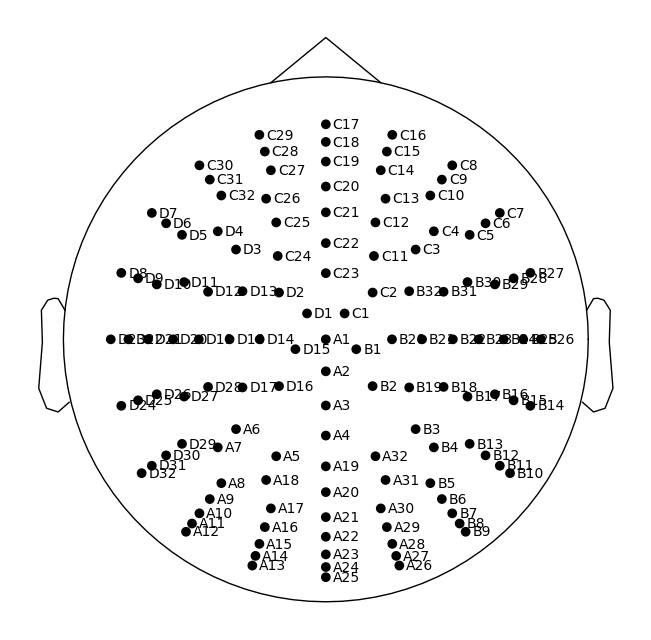

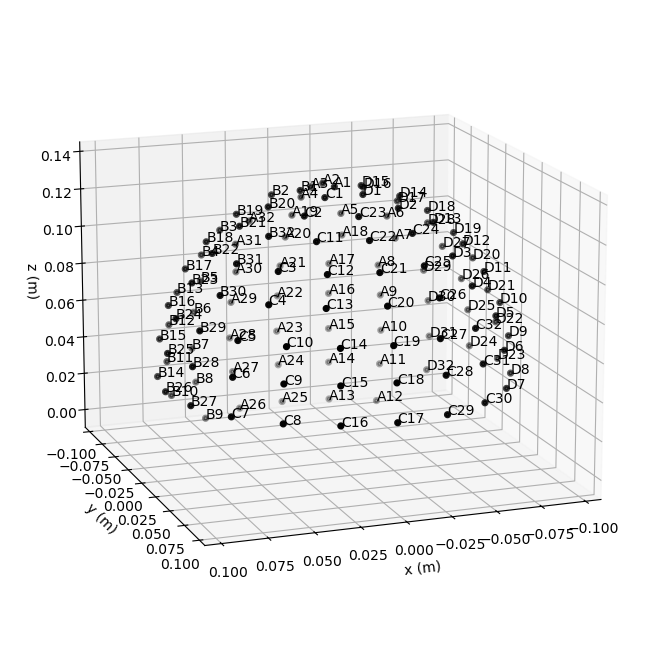

In [3]:
# --------------------------------
# Selection of the correct sensors and ploting
# --------------------------------

nbr_chanel = 128
Sensor_subj1 = subj1.drop_channels(Channels_name[nbr_chanel:])

# Using the biosemi128 sensor postion 
easycap_montage = mne.channels.make_standard_montage("biosemi128")

# Use the preloaded montage
Sensor_subj1.set_montage(easycap_montage)
fig = Sensor_subj1.plot_sensors(show_names=True)


fig = easycap_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial